In [1]:
pip install scikit-learn numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [3]:
csv_url = r"C:\Users\GIA BAO\OneDrive - Trường ĐH CNTT - University of Information Technology\Vinamilk (1).csv"

In [5]:
df = pd.read_csv(csv_url, delimiter=';')
print(df)

            Date       Price        Open        High        Low      Vol  \
0     12/15/2023   68,100.00   68,500.00   68,600.00  68,100.00    3.74M   
1     12/14/2023   68,400.00   68,400.00   68,900.00  68,200.00    1.46M   
2     12/13/2023   68,200.00   69,600.00   69,700.00  68,100.00    4.51M   
3     12/12/2023   69,400.00   70,000.00   70,100.00  69,000.00    2.79M   
4     12/11/2023   70,000.00   70,500.00   70,500.00  69,900.00    4.73M   
...          ...         ...         ...         ...        ...      ...   
1724  01/20/2017  100,319.00   99,529.00  101,346.00  99,529.00    1.91M   
1725  01/19/2017   99,529.00   99,766.00   99,766.00  99,450.00    1.04M   
1726  01/18/2017   99,529.00   99,529.00   99,687.00  98,897.00    1.02M   
1727  01/17/2017   99,608.00  100,082.00  100,082.00  99,608.00  698.86K   
1728  01/16/2017   99,924.00  100,319.00  100,398.00  99,845.00  723.16K   

      Change  
0     -0.44%  
1      0.29%  
2     -1.73%  
3     -0.86%  
4      1.45%

In [6]:
# Convert the 'Date' column to datetime with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

In [7]:
df.sort_values(by='Date', inplace=True)
print(df)

                 Price        Open        High        Low      Vol  Change
Date                                                                      
2017-01-16   99,924.00  100,319.00  100,398.00  99,845.00  723.16K  -0.32%
2017-01-17   99,608.00  100,082.00  100,082.00  99,608.00  698.86K  -0.32%
2017-01-18   99,529.00   99,529.00   99,687.00  98,897.00    1.02M  -0.08%
2017-01-19   99,529.00   99,766.00   99,766.00  99,450.00    1.04M   0.00%
2017-01-20  100,319.00   99,529.00  101,346.00  99,529.00    1.91M   0.79%
...                ...         ...         ...        ...      ...     ...
2023-12-11   70,000.00   70,500.00   70,500.00  69,900.00    4.73M   1.45%
2023-12-12   69,400.00   70,000.00   70,100.00  69,000.00    2.79M  -0.86%
2023-12-13   68,200.00   69,600.00   69,700.00  68,100.00    4.51M  -1.73%
2023-12-14   68,400.00   68,400.00   68,900.00  68,200.00    1.46M   0.29%
2023-12-15   68,100.00   68,500.00   68,600.00  68,100.00    3.74M  -0.44%

[1729 rows x 6 columns]


In [8]:
# Remove ',' and convert format
cols_to_convert = ['Price', 'Open', 'High', 'Low']
df[cols_to_convert] = df[cols_to_convert].replace(',', '', regex=True).astype(float)

# Convert the format of the "Vol" column
def convert_vol(value):
    if 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'K' in value:
        return float(value.replace('K', '')) * 1e3
    else:
        return float(value)

df['Vol'] = df['Vol'].apply(convert_vol)

# Convert the format of the "Change" column
df['Change'] = df['Change'].replace('%', '', regex=True).astype(float) / 100.0
print(df)

               Price      Open      High      Low        Vol  Change
Date                                                                
2017-01-16   99924.0  100319.0  100398.0  99845.0   723160.0 -0.0032
2017-01-17   99608.0  100082.0  100082.0  99608.0   698860.0 -0.0032
2017-01-18   99529.0   99529.0   99687.0  98897.0  1020000.0 -0.0008
2017-01-19   99529.0   99766.0   99766.0  99450.0  1040000.0  0.0000
2017-01-20  100319.0   99529.0  101346.0  99529.0  1910000.0  0.0079
...              ...       ...       ...      ...        ...     ...
2023-12-11   70000.0   70500.0   70500.0  69900.0  4730000.0  0.0145
2023-12-12   69400.0   70000.0   70100.0  69000.0  2790000.0 -0.0086
2023-12-13   68200.0   69600.0   69700.0  68100.0  4510000.0 -0.0173
2023-12-14   68400.0   68400.0   68900.0  68200.0  1460000.0  0.0029
2023-12-15   68100.0   68500.0   68600.0  68100.0  3740000.0 -0.0044

[1729 rows x 6 columns]


In [9]:
# Identify features and target variables
features = ['Open', 'High', 'Low', 'Vol']
target = 'Price'

Train-Test-Val Ratio: 7:2:1
Test RMSE: 1190.8043940846626
Test MAE: 870.5615420289865
Test MAPE: 1.22
------------------------------


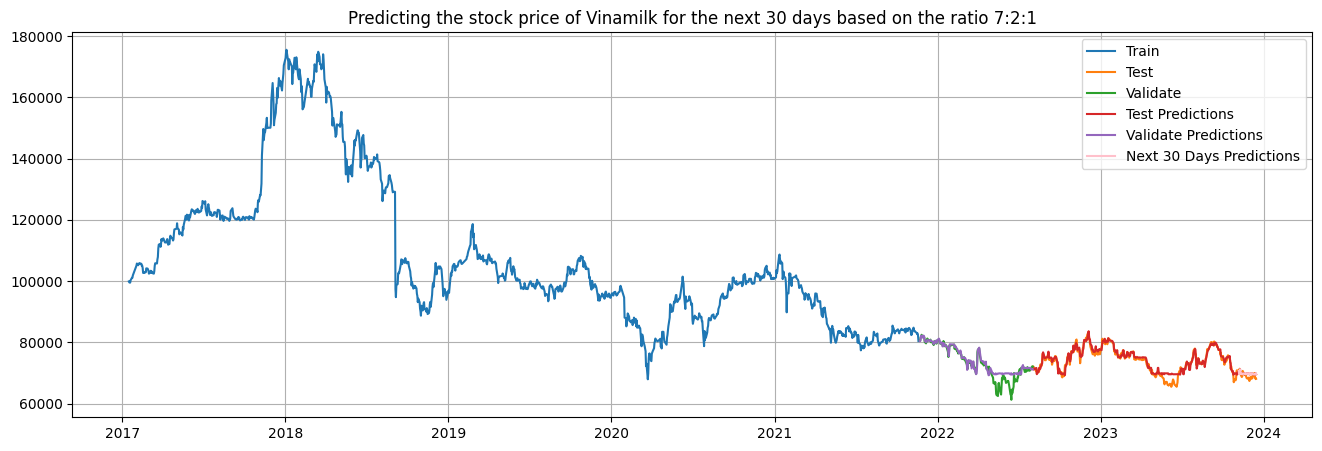

Train-Test-Val Ratio: 6:3:1
Test RMSE: 1564.11536377413
Test MAE: 1017.1103185328186
Test MAPE: 1.45
------------------------------


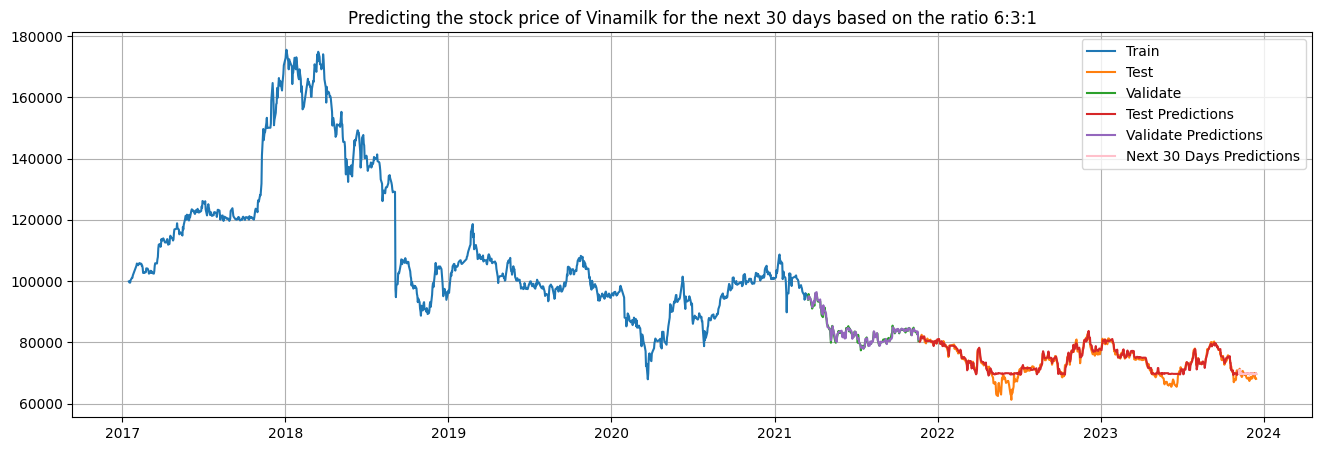

Train-Test-Val Ratio: 5:3:2
Test RMSE: 1603.553835351727
Test MAE: 1061.7685135135137
Test MAPE: 1.51
------------------------------


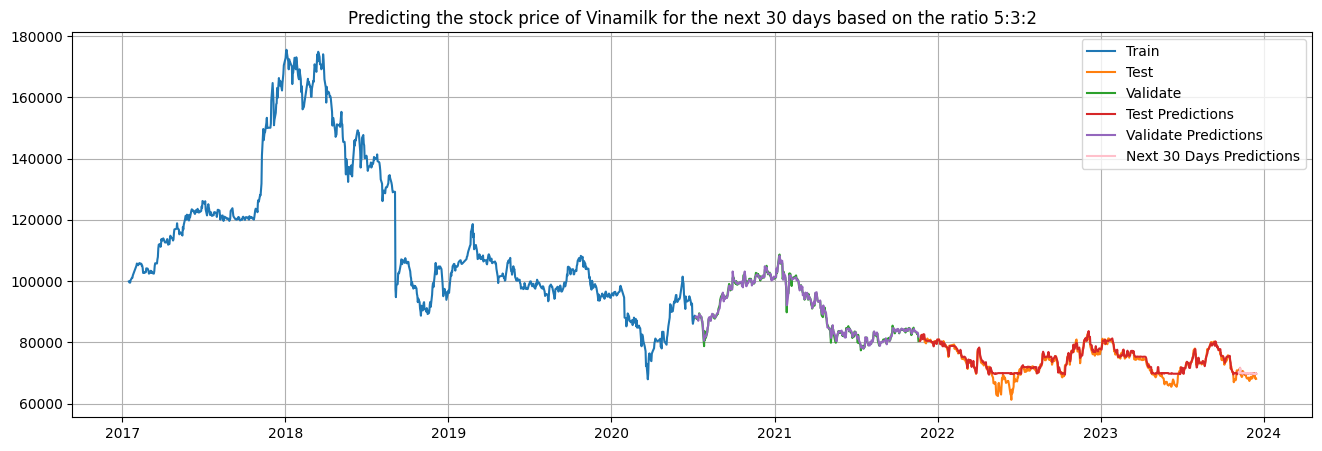

In [12]:
import matplotlib.pyplot as plt
# Initialize lists to store predictions for each ratio
all_train_predictions = []
all_test_predictions = []
all_val_predictions = []

# Drawing plots for all three ratios
ratios = [(7, 2, 1), (6, 3, 1), (5, 3, 2)]

for train_ratio, test_ratio, val_ratio in ratios:
    # Split the data into training, testing, and validation sets
    train_size = int(len(df) * train_ratio / (train_ratio + test_ratio + val_ratio))
    test_size = int(len(df) * test_ratio / (train_ratio + test_ratio + val_ratio))

    train_data, test_data = train_test_split(df, test_size=test_size, shuffle=False)
    train_data, val_data = train_test_split(train_data, test_size=val_ratio / (train_ratio + val_ratio), shuffle=False)

    # Build a Random Forest model
    model = RandomForestRegressor()

    # Train the model
    model.fit(train_data[features], train_data[target])

    # Predict on the training, testing, and validation sets
    train_predictions = model.predict(train_data[features])
    test_predictions = model.predict(test_data[features])
    val_predictions = model.predict(val_data[features])

    # Save predictions for each ratio
    all_train_predictions.append(train_predictions)
    all_test_predictions.append(test_predictions)
    all_val_predictions.append(val_predictions)

    # Calculate evaluation metrics for the testing set
    test_rmse = np.sqrt(mean_squared_error(test_data[target], test_predictions))
    test_mae = mean_absolute_error(test_data[target], test_predictions)
    test_mape = np.mean(np.abs((test_data[target] - test_predictions) / test_data[target])) * 100

    # Calculate evaluation metrics for the training set
    train_rmse = np.sqrt(mean_squared_error(train_data[target], train_predictions))
    train_mae = mean_absolute_error(train_data[target], train_predictions)
    train_mape = np.mean(np.abs((train_data[target] - train_predictions) / train_data[target])) * 100

    # Calculate evaluation metrics for the validation set
    val_rmse = np.sqrt(mean_squared_error(val_data[target], val_predictions))
    val_mae = mean_absolute_error(val_data[target], val_predictions)
    val_mape = np.mean(np.abs((val_data[target] - val_predictions) / val_data[target])) * 100

    # Print result for each ratio
    print(f'Train-Test-Val Ratio: {train_ratio}:{test_ratio}:{val_ratio}')
    print(f'Test RMSE: {test_rmse}')
    print(f'Test MAE: {test_mae}')
    print(f'Test MAPE: {test_mape:.2f}')
    print('-' * 30)

    # Plotting for each ratio
    last_data = df.index[-30:]
    y_pred_test = model.predict(df.loc[last_data][features])

    plt.figure(figsize=(16, 5))
    plt.title(f"Predicting the stock price of Vinamilk for the next 30 days based on the ratio {train_ratio}:{test_ratio}:{val_ratio}")
    plt.grid(True)
    plt.plot(train_data.index, train_data['Price'])
    plt.plot(test_data.index, test_data['Price'])
    plt.plot(val_data.index, val_data['Price'])
    plt.plot(test_data.index, test_predictions)
    plt.plot(val_data.index, val_predictions)
    plt.plot(last_data, y_pred_test, color="pink")
    plt.legend(['Train', 'Test', 'Validate', 'Test Predictions', 'Validate Predictions', 'Next 30 Days Predictions'])
    plt.show()